In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
# Q1. For the following dataset generated using NumPy:
df = pd.DataFrame(np.random.normal(loc=70, scale=10, size=200))
# Plot a histogram of scores
# Draw a vertical line for the mean & try to intrepret the results.
df

,0
0,85.469261
1,79.507101
2,58.534896
3,69.331539
4,71.133435
...,...
195,78.291461
196,71.794567
197,59.976789
198,54.557958


70.22281318935951


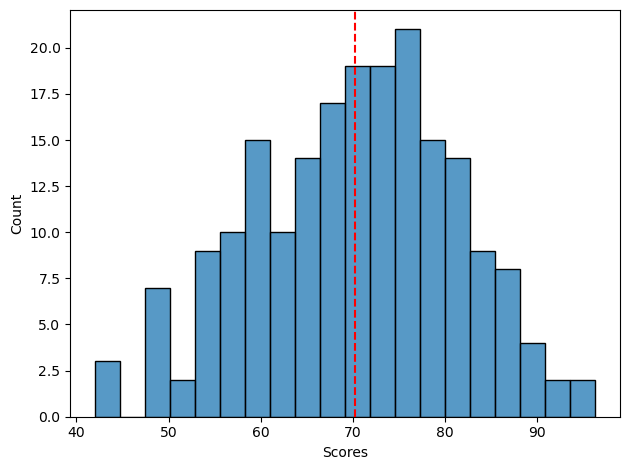

In [65]:
fig, ax = plt.subplots()

sns.histplot(
    data=df,
    x=df.columns[0],
    bins=20
)
ax.set_xlabel("Scores")
fig.tight_layout()

# mean_value = df[df.columns[0]].sum() / len(df)
mean_value = df[0].mean()

plt.axvline(
    x=mean_value,
    label="Mean",
    color="red",
    linewidth="1.5",
    linestyle="--"
)
print(mean_value)

In [73]:
# Q2. For the Seaborn penguins dataset, do the following:
# Plot flipper_length_mm vs body_mass_g
# Color by species

ds = sns.load_dataset("penguins")
ds

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


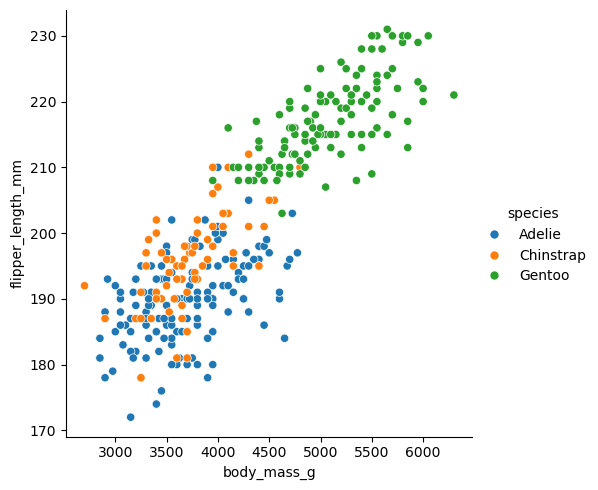

In [70]:
sns.relplot(
    data=ds,
    x="body_mass_g",
    y="flipper_length_mm",
    hue="species"
)

In [78]:
# Q3. For the Seaborn tips dataset, do the following:
# Create a box plot of total_bill for each day
# Add hue="sex"
# Identify which day has the highest median bill
# Comment on ouliers

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


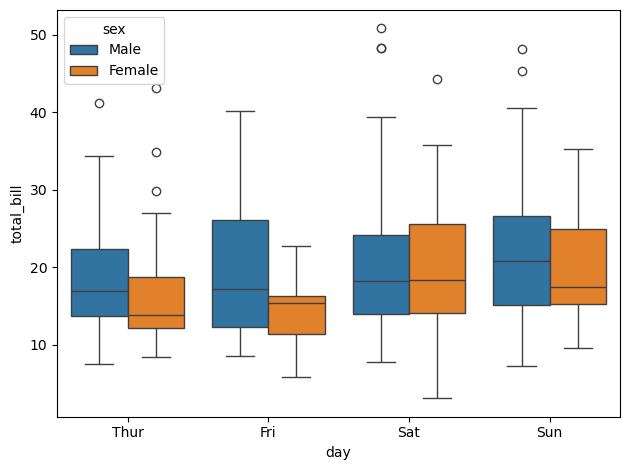

In [81]:
sns.boxplot(
    data=tips,
    x="day",
    y="total_bill",
    hue="sex"
)
plt.tight_layout()

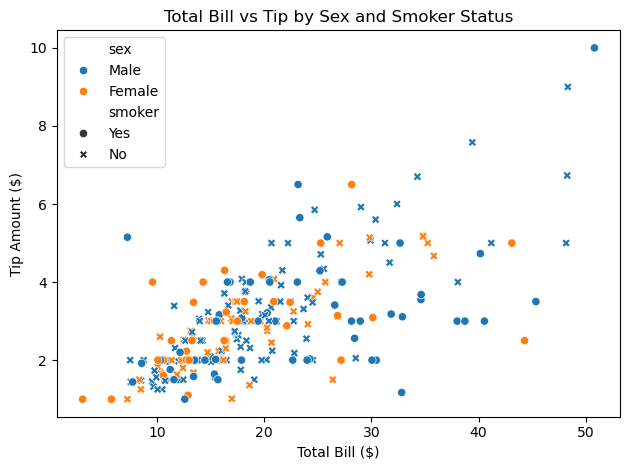

In [90]:
# Q4. For the Seaborn tips dataset, do the following:
# Create a scatter plot of total_bill vs tip
# Color points by sex
# Use different markers for smoker
# Add a title and axis labels
# Analyze: Do smokers tend to tip differently?

sns.scatterplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="sex",
    style="smoker"
)

plt.title("Total Bill vs Tip by Sex and Smoker Status")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip Amount ($)")
plt.tight_layout()

### Analysis: Do smokers tend to tip differently?

Based on the scatter plot visualization of `total_bill` vs `tip`, we can observe the following patterns:

1.  **General Trend:** For both smokers and non-smokers, there is a positive correlation; as the total bill increases, the tip amount generally increases.
2.  **Variance in Behavior:**
    * **Non-Smokers:** Tend to follow a more consistent linear pattern. Their tipping behavior appears more predictable.
    * **Smokers:** Show much higher variance. Their data points are more scattered, indicating erratic behavior. Some smokers give exceptionally high tips, while others with similar bill amounts give relatively low tips.
3.  **Conclusion:** While the average tip might be comparable, **smokers are less predictable tippers** compared to non-smokers.

In [91]:
# Q5. For the Seaborn tips dataset, do the following:
# Create a pivot table of average tip
    #Rows:day
    #Columns:time
# Plot the pivot table as a heatmap
# Annotate values
# Interpret which day-time combination performs best
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [98]:
tips_pivot = tips.pivot_table(index="day", columns="time", values="tip", aggfunc="mean", observed=False)
tips_pivot

time,Lunch,Dinner
day,,
Thur,2.767705,3.000000
Fri,2.382857,2.940000
Sat,NaN,2.993103
Sun,NaN,3.255132


<Axes: xlabel='time', ylabel='day'>

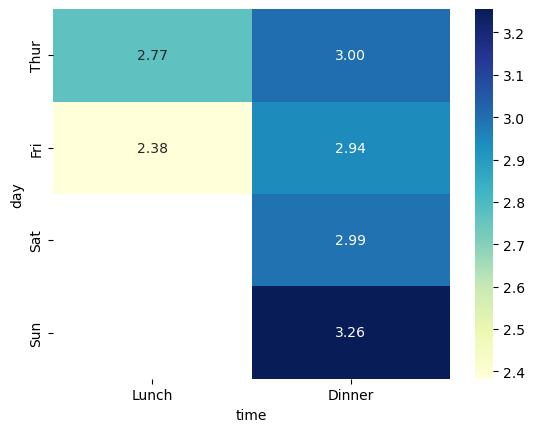

In [99]:
sns.heatmap(
    data=tips_pivot,
    annot=True,     # This enables the numbers inside the boxes
    cmap='YlGnBu',  # Color map (Yellow, Green, Blue)
    fmt='.2f'
)

# 📊 Heatmap Interpretation: Average Tips by Day & Time

### 1. The "Best" Time for Tips
* **Observation:** The darkest blue block is located at **Sunday / Dinner**.
* **Value:** $3.26
* **Interpretation:** Sunday Dinner is the most profitable shift for waiters on average. Customers tend to leave the highest tips during this time.

### 2. The "Lowest" Time for Tips
* **Observation:** The lightest color (yellow/cream) is located at **Friday / Lunch**.
* **Value:** $2.38
* **Interpretation:** Friday Lunch yields the lowest average tip amount among the recorded times.

### 3. General Trend: Dinner vs. Lunch
* **Observation:** If you compare the columns, the **Dinner** column generally has darker shades and higher numbers than the **Lunch** column.
    * *Thursday:* Dinner ($3.00) > Lunch ($2.77)
    * *Friday:* Dinner ($2.94) > Lunch ($2.38)
* **Conclusion:** Dinner shifts consistently perform better than lunch shifts in terms of average tip size.

### 4. Missing Data (The Empty Spaces)
* **Observation:** The blocks for **Saturday Lunch** and **Sunday Lunch** are white/blank.
* **Interpretation:** There are `NaN` (Not a Number) or null values for these combinations. 
* **Reasoning:** This implies that either the restaurant is closed for lunch on weekends, or the dataset simply contains no records for weekend lunches.

---
**Summary for Business Insight:** To maximize tip earnings, staff should prioritize working **Dinner shifts**, specifically on **Sundays** and **Saturdays**.